# Bike Sharing Demand

### Referências

* https://www.kaggle.com/c/bike-sharing-demand/

## Importando as bibliotecas e analisando os dados

In [267]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Algoritmos de Regressão
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#Seleção de Modelos
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

#Métricas
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error

In [268]:
train = pd.read_csv(r'C:\Users\LENOVO\Downloads\bike-sharing-demand\train.csv')
test = pd.read_csv(r'C:\Users\LENOVO\Downloads\bike-sharing-demand\test.csv')

In [269]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [270]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [271]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [272]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [273]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [274]:
print(train.season.unique())

[1 2 3 4]


C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


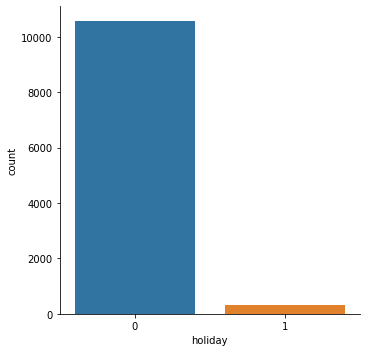

In [275]:
sns.factorplot(x='holiday', data=train, kind='count', size=5, aspect=1)

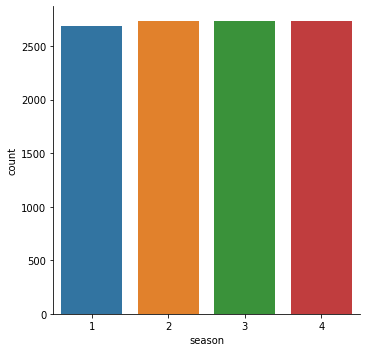

In [276]:
sns.factorplot(x='season', data=train, kind='count', size=5, aspect=1)

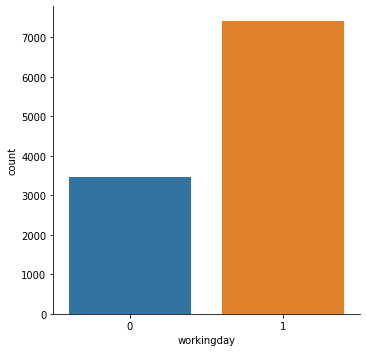

In [277]:
sns.factorplot(x='workingday', data=train, kind='count', size=5, aspect=1)

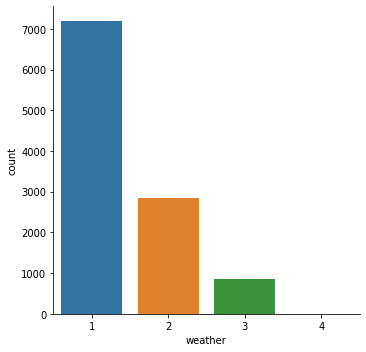

In [278]:
sns.factorplot(x='weather', data=train, kind='count', size=5, aspect=1)

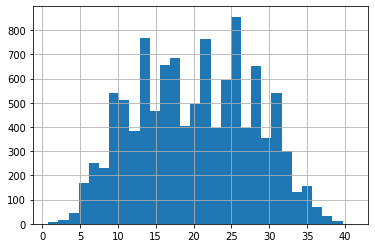

In [279]:
train.temp.hist(bins=30)

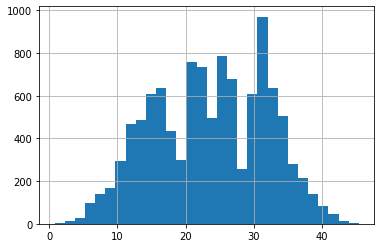

In [280]:
train.atemp.hist(bins=30)

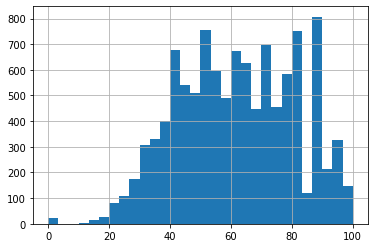

In [281]:
train.humidity.hist(bins=30)

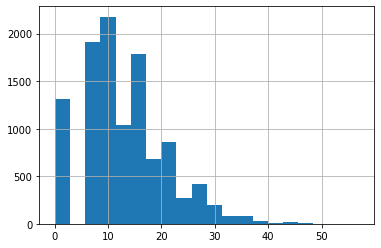

In [282]:
train.windspeed.hist(bins=20)

In [283]:
# Transformando a coluna de datas em colunas separadas de horas, dia, mês e ano no treino.
train["hour"] = [t.hour for t in pd.DatetimeIndex(train.datetime)]
train["day"] = [t.dayofweek for t in pd.DatetimeIndex(train.datetime)]
train["month"] = [t.month for t in pd.DatetimeIndex(train.datetime)]
train['year'] = [t.year for t in pd.DatetimeIndex(train.datetime)]
train['year'] = train['year'].map({2011:0, 2012:1})
train.head()

# Transformando a coluna de datas em colunas separadas de horas, dia, mês e ano no teste.
test["hour"] = [t.hour for t in pd.DatetimeIndex(test.datetime)]
test["day"] = [t.dayofweek for t in pd.DatetimeIndex(test.datetime)]
test["month"] = [t.month for t in pd.DatetimeIndex(test.datetime)]
test['year'] = [t.year for t in pd.DatetimeIndex(test.datetime)]
test['year'] = test['year'].map({2011:0, 2012:1})
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1,0


In [284]:
datetimecol = test['datetime']
train.drop('datetime', inplace=True, axis=1)
test.drop('datetime', inplace=True, axis=1)

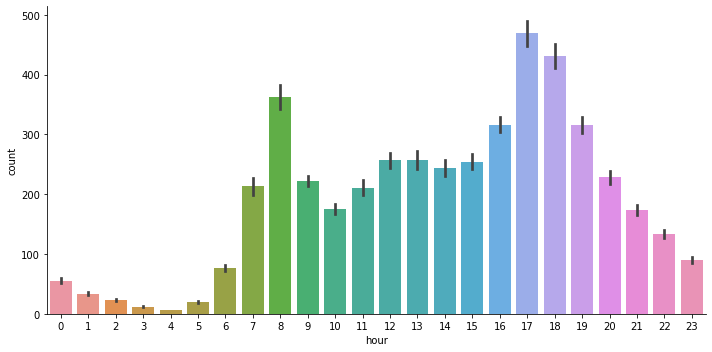

In [285]:
sns.factorplot(x='hour', y='count', data=train, kind='bar', size=5, aspect=2)

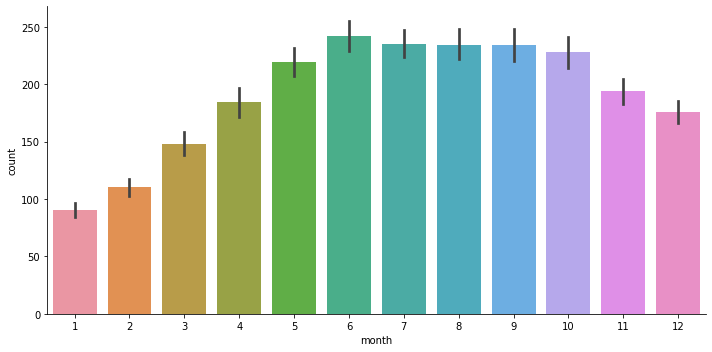

In [286]:
sns.factorplot(x='month', y='count', data=train, kind='bar', size=5, aspect=2)

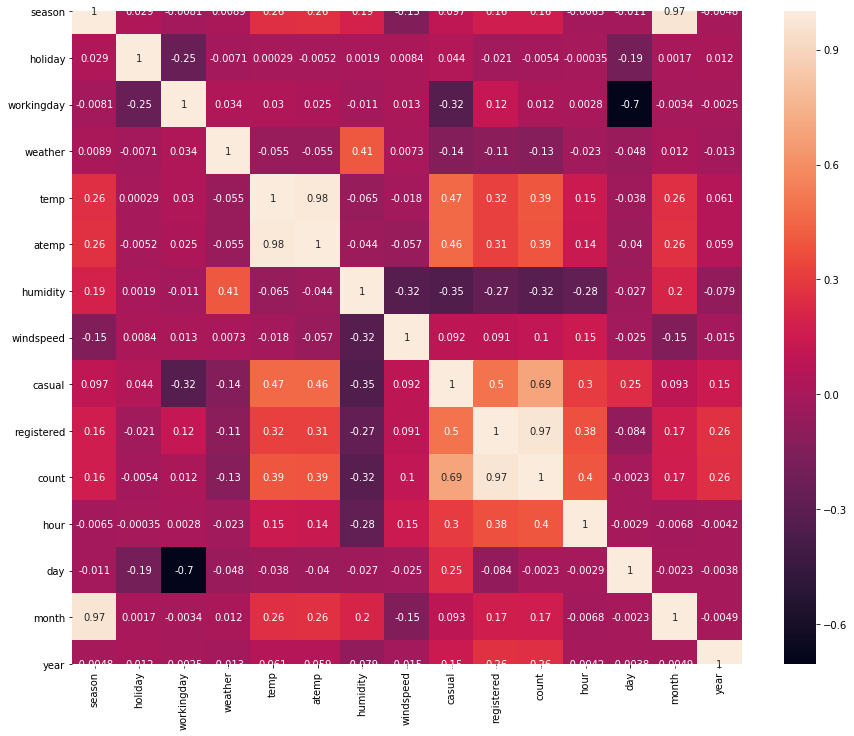

In [287]:
f, ax = plt.subplots(figsize=(15, 12))

sns.heatmap(train.corr(), annot = True, )

In [288]:
#Verificando máximos e mínimos de variáveis continuas

train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [289]:
train.atemp.describe()

count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64

In [290]:
train.humidity.describe()

count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64

In [291]:
weather = pd.get_dummies(train['weather'], prefix='weather')
train = pd.concat([train,weather], axis=1)
season = pd.get_dummies(train['season'], prefix='season')
train = pd.concat([train,season], axis=1)
weather = pd.get_dummies(test['weather'], prefix='weather')
test = pd.concat([test,weather], axis=1)
season = pd.get_dummies(test['season'], prefix='season')
test = pd.concat([test,season], axis=1)

In [292]:
train.drop(['season', 'weather'], inplace=True, axis=1)
test.drop(['season', 'weather'], inplace=True, axis=1)

In [293]:
train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,hour,...,month,year,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4
0,0,0,9.84,14.395,81,0.0,3,13,16,0,...,1,0,1,0,0,0,1,0,0,0
1,0,0,9.02,13.635,80,0.0,8,32,40,1,...,1,0,1,0,0,0,1,0,0,0
2,0,0,9.02,13.635,80,0.0,5,27,32,2,...,1,0,1,0,0,0,1,0,0,0
3,0,0,9.84,14.395,75,0.0,3,10,13,3,...,1,0,1,0,0,0,1,0,0,0
4,0,0,9.84,14.395,75,0.0,0,1,1,4,...,1,0,1,0,0,0,1,0,0,0


In [249]:
feature_cols = [
    'holiday', 
    'workingday',
    'temp', 
    'atemp',
    'humidity',
    'windspeed',
    'hour',
    'day',
    'month',
    'year',
    'weather_1',
    'weather_2',
    'weather_3',
    'weather_4',
    'season_1',
    'season_2',
    'season_3',
    'season_4'
]

X = train[feature_cols]
Y = train['count']

In [250]:
train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,hour,...,month,year,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4
0,0,0,9.84,14.395,81,0.0,3,13,16,0,...,1,0,1,0,0,0,1,0,0,0
1,0,0,9.02,13.635,80,0.0,8,32,40,1,...,1,0,1,0,0,0,1,0,0,0
2,0,0,9.02,13.635,80,0.0,5,27,32,2,...,1,0,1,0,0,0,1,0,0,0
3,0,0,9.84,14.395,75,0.0,3,10,13,3,...,1,0,1,0,0,0,1,0,0,0
4,0,0,9.84,14.395,75,0.0,0,1,1,4,...,1,0,1,0,0,0,1,0,0,0


In [251]:
x_train,x_test,y_train,y_test=train_test_split(X, Y,test_size=0.25,random_state=42)

In [252]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## Utilizando as regressões

In [253]:
regressors = [
    LinearRegression(),
    DecisionTreeRegressor(),
    SVR(),
    KNeighborsRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor()
]

In [254]:
for reg in regressors:
        name = reg.__class__.__name__
        reg.fit(x_train, y_train)
        train_pred = reg.predict(x_test)
        print("="*30)
        print(name)
        print(r2_score(train_pred, y_test))

LinearRegression
-9.956480084838404e-13
DecisionTreeRegressor
0.9066316220643449
SVR
-2.685928335511698
KNeighborsRegressor
0.4166100962227919
RandomForestRegressor
0.9505337918600973
GradientBoostingRegressor
0.814146081291283
AdaBoostRegressor
0.41360997920389175


In [183]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [184]:
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 12.4min finished


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [294]:
feature_cols = [
    'holiday', 
    'workingday',
    'temp', 
    'atemp',
    'humidity',
    'windspeed',
    'hour',
    'day',
    'month',
    'year',
    'weather_1',
    'weather_2',
    'weather_3',
    'weather_4',
    'season_1',
    'season_2',
    'season_3',
    'season_4'
]

X_train = train[feature_cols]
X_test = test[feature_cols]
Y_train = train['count']

In [295]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [296]:
best_grid = grid_search.best_estimator_
rf = RandomForestRegressor(
       bootstrap=True,
       max_depth=110,
       max_features=3,
       min_samples_leaf=3,
       min_samples_split=8,
       n_estimators=100
)
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)

In [ ]:
submission = pd.DataFrame({'datetime': datetimecol, 'count': y_pred})
submission.to_csv('submission.csv', index = False)